# 텐서플로 첫걸음 3장
## p64
 - 아래 코드는 어제의 코드에서 복사해옴

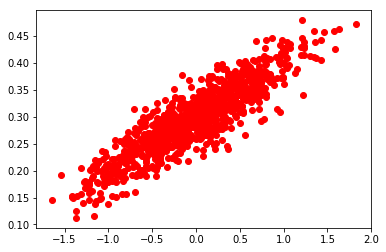

0 [0.370563] [0.30681118]
0 0.025790587


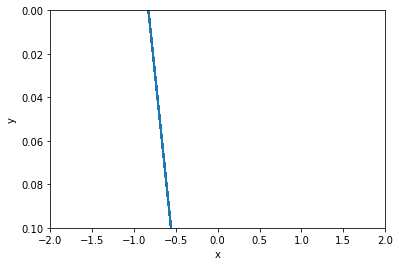

1 [0.27911294] [0.30419242]
1 0.011857711


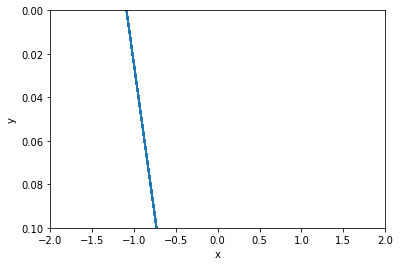

2 [0.21832997] [0.30255195]
2 0.0057031508


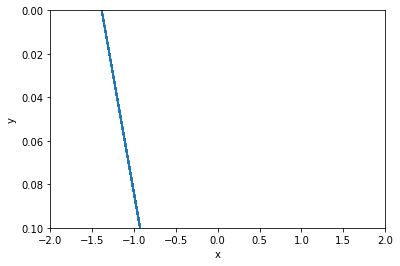

3 [0.17793192] [0.30146158]
3 0.0029844954


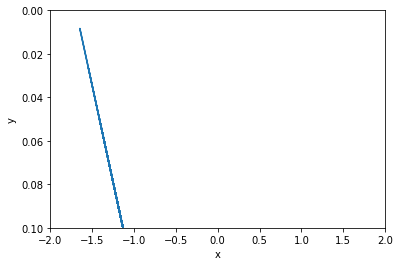

4 [0.15108226] [0.3007369]
4 0.0017835844


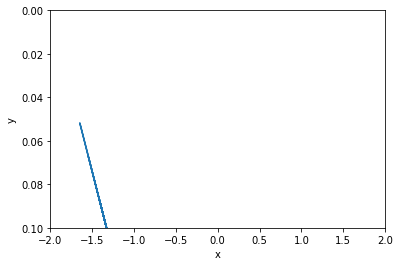

5 [0.13323723] [0.30025527]
5 0.0012531055


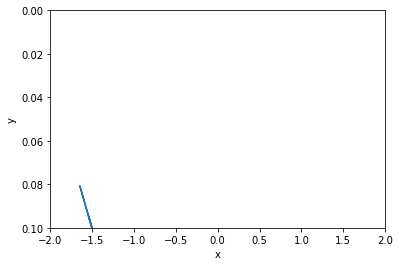

6 [0.12137693] [0.29993516]
6 0.0010187774


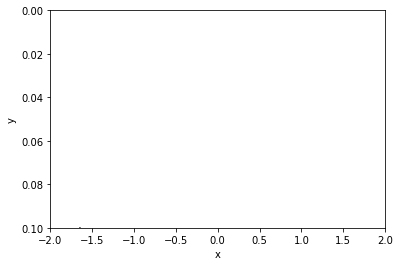

7 [0.11349425] [0.2997224]
7 0.0009152674


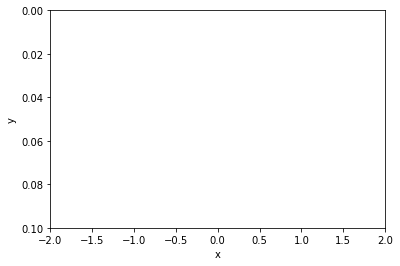

In [30]:
import numpy as np

num_points = 1000
vectors_set = []

for i in range(num_points):
  x1 = np.random.normal(0.0, 0.55)
  y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
  vectors_set.append([x1,y1])
  
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.show()

import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data +b

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(8):
  sess.run(train)
  print(step, sess.run(W), sess.run(b))
  print(step, sess.run(loss))
  
  plt.plot(x_data, y_data, 'ro')
  plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
  plt.xlabel('x')
  plt.xlim(-2,2)
  plt.ylim(0.1, 0,6)
  plt.ylabel('y')
  plt.show()
  

## p68

In [0]:
# points 는 2000 *2 배열 입니다
vectors = tf.constant(num_points)
expanded_vectors = tf.expand_dims(vectors, 0)

In [0]:
expanded_vectors.get_shape()

TensorShape([Dimension(1)])

## p74 
 - K 평균 알고리즘 : 군집화 문제를 풀기 위한 자율 학습 알고리즘의 일종
 - 간단한 방법으로 주어진 데이터를 군집의 갯수로 그룹화 함
 - 중심 이라고 부르는(센트로이드, Centroid) K개의 점 으로 각기 다른 그룹의 중심점을 나타내며 데이터들은 K개의 군집 중 하나에만 속할 수 있습니다
 - 오차함수를 최소화하려면 계산비용이 너무 많이 듭니다. 계산하기에 컴퓨팅 파워와 전력소모 그리고 시간이 많이 소요되는듯 합니다.
 - 이 문제를 극복하고자 휴리스틱 방법과 반복개선(iterative refinement)기법 사용

In [0]:
import numpy as np

num_points = 2000
vectors_set = []

for i in range(num_points):
  if np.random.random() > 0.5:
    vectors_set.append([np.random.normal(0.0, 0.9), 
                        np.random.normal(0.0, 0.9)])
  else:
      vectors_set.append([np.random.normal(3.0, 0.5), 
                        np.random.normal(1.0, 0.5)])
      

## P75 ~ 76 
 - 두개의 군집으로 생성됨을 확인

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


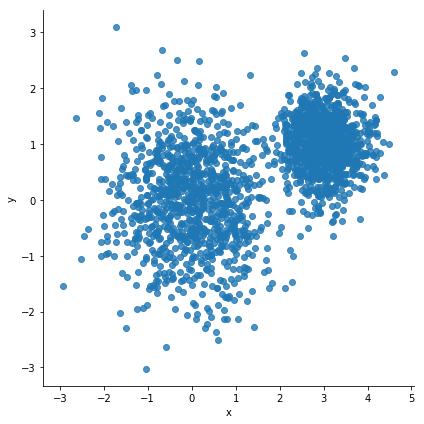

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x" : [v[0] for v in vectors_set], 
                  "y" : [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size = 6)
plt.show()

- vector_values를 사용하여 constant를 만들고 초기 센트로이드 네개를 랜덤하게 선택합니다. 그런 후에 vectors, centroids 텐서에 각각 차원을 추가합니다

## P76
 - 텐서플로에서 4개의 군집으로 그룹화
 - K-평균 알고리즘의 구현 코드 - FROM 숀 시미스터
 

# p76 동작안함 - 아래 저자의 최신 코드를 활용해 실습

In [0]:
import tensorflow as tf

#6
'''
vector_values를 사용하여 constant를 만들고 초기 센트로이드 네개를 랜덤하게 선택합니다. 그런 후에 vectors, centroids 텐서에 각각 차원을 추가합니다.
'''
vectors = tf.constant(vectors_set)
k=4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,
                                                      expanded_centroides)), 2), 0)

#means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors,tf.reshape(tf.where(tf.equal(assignments, c)),[1,-1])), reduction_indices = [1]) for c in range(k) ])
means = tf.concat([
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
      for c in range(num_clusters)], 0)

update_centroides = tf.assign(centroides, means)
#init_op = tf.initialize_all_variables()
init_op = tf.global_variables_initializer()#python 3.7
sess = tf.Session()
sess.run(init_op)

for step in range(100):
  _, centroid_values, asssignment_values = sess.run([update_centroides, centroides, assignments])

## 갓해성님의 코드 ( 기존 76p 대체)

In [0]:
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [0]:
num_vectors = 1000
num_clusters = 4
num_steps = 100
vector_values = []
for i in range(num_vectors):
  if np.random.random() > 0.5:
    vector_values.append([np.random.normal(0.5, 0.6),
                          np.random.normal(0.3, 0.9)])
  else:
    vector_values.append([np.random.normal(2.5, 0.4),
                         np.random.normal(0.8, 0.5)])

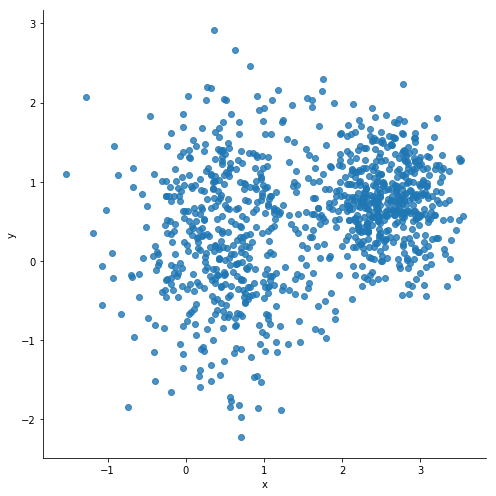

In [26]:
df = pd.DataFrame({"x": [v[0] for v in vector_values], 
                   "y": [v[1] for v in vector_values]})
sns.lmplot("x", "y", data=df, fit_reg=False, height=7)
plt.show()

vector_values를 사용하여 constant를 만들고 초기 센트로이드 네개를 랜덤하게 선택합니다. 그런 후에 vectors, centroids 텐서에 각각 차원을 추가합니다.



In [33]:
vectors = tf.constant(vector_values)
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [num_clusters,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 1000, 2)
(4, 1, 2)


- 각 데이터 포인트에서 가장 가까운 센트로이드의 인덱스를 계산합니다.


In [0]:
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)

 - 각 클러스터의 평균 값을 계산하여 새로운 센트로이드를 구합니다.



In [0]:
means = tf.concat([
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in range(num_clusters)], 0)

update_centroids = tf.assign(centroids, means)

 - 변수를 초기화하고 세션을 시작합니다.



## in6
- 텐서플로 첫걸음 책에서의 구절 
- vector_values를 사용하여 constant를 만들고 초기 센트로이드 네개를 랜덤하게 선택합니다. 그런 후에 vectors, centroids 텐서에 각각 차원을 추가합니다.



In [43]:
#for step in range(num_steps):
# 윗줄이 에러가 발생하여 변경

##for step in range(100):
##   _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])


for step in range(100):
  _, centroid_values, asssignment_values = sess.run([update_centroides, centroides, assignments])
  
print("centroids")
print(centroid_values)

FailedPreconditionError: ignored

 - vector_values 데이터를 클러스터에 따라 색깔을 구분하여 산포도를 그립니다.

In [38]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(vector_values[i][0])
    data["y"].append(vector_values[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, 
           fit_reg=False, height=7, 
           hue="cluster", legend=False)
plt.show()

NameError: ignored

# 이 문서의 끝

박해성님의 텐서플로 첫걸음 78p